# Logistic Regression

## Generating Example Classification Data

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
def gen_data(n, h, sd1, sd2):
    # class 1
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    # class 2
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)    

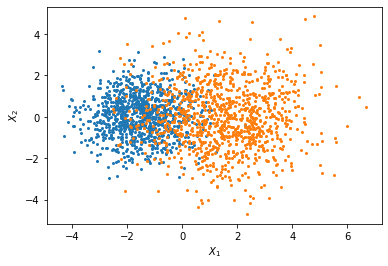

In [5]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms = 2)
    plt.plot(x2, y2, "o", ms = 2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    
plot_data(x1, y1, x2, y2)